# Table of Contents
* [Filtering](#Filtering)
	* [Filter out dangling ends and self-circles](#Filter-out-dangling-ends-and-self-circles)
	* [Apply filters on the data](#Apply-filters-on-the-data)
		* [Evaluate changes](#Evaluate-changes)


# Filtering

## Filter out dangling ends and self-circles

In [2]:
from pytadbit.mapping.filter import filter_reads

In [3]:
r_enz = 'HindIII'
rep = 'T0'

The `max_molecule_length` parameter used to filter-out pseudo-dangling-ends can be extracted from the previous section in the computation of insert size.

The `min_distance_to_re`, that affects the detection of random breaks, should be a bit larger in order to contain almost all the fragments.

In [4]:
# this will last ~10 minutes
masked = filter_reads(
    'results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(r_enz, rep), 
    max_molecule_length=750, over_represented=0.005, max_frag_size=100000, 
    min_frag_size=100, re_proximity=5, min_dist_to_re=1000)

Filtered reads (and percentage of total):

     Mapped both                :     21258763 (100.00%)
  -----------------------------------------------------
   1- self-circle               :       400576 (  1.88%)
   2- dangling-end              :      1174450 (  5.52%)
   3- error                     :        26229 (  0.12%)
   4- extra dangling-end        :      2971724 ( 13.98%)
   5- too close from RES        :      2959353 ( 13.92%)
   6- too short                 :       227026 (  1.07%)
   7- too large                 :         2322 (  0.01%)
   8- over-represented          :       693664 (  3.26%)
   9- duplicated                :      2123831 (  9.99%)
  10- random breaks             :      2342747 ( 11.02%)


This generates a dictionary with the different filters and the reads affected by each.

## Apply filters on the data

In [5]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(r_enz, rep), 
             'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), masked, 
             filters=[1, 2, 3, 4, 6, 7, 8, 9, 10])

    saving to file 12966196 reads without .


12966196

### Evaluate changes

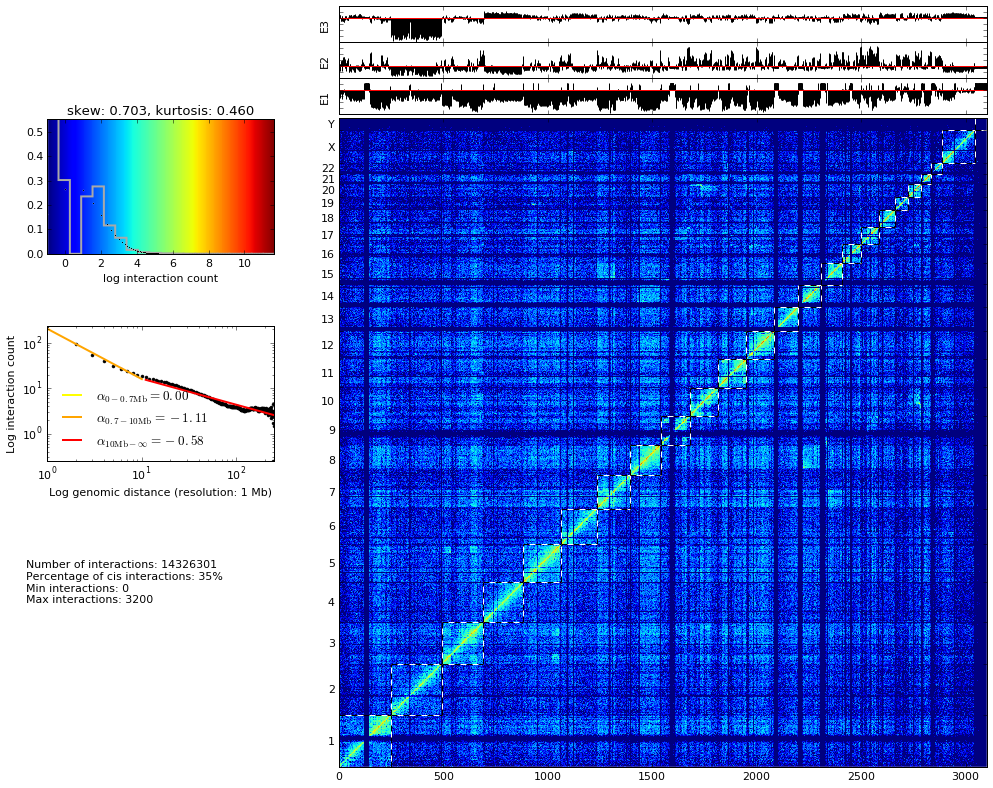

In [6]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), 
        resolution=1000000, show=True)

Zoom to a single chromosome or a region:

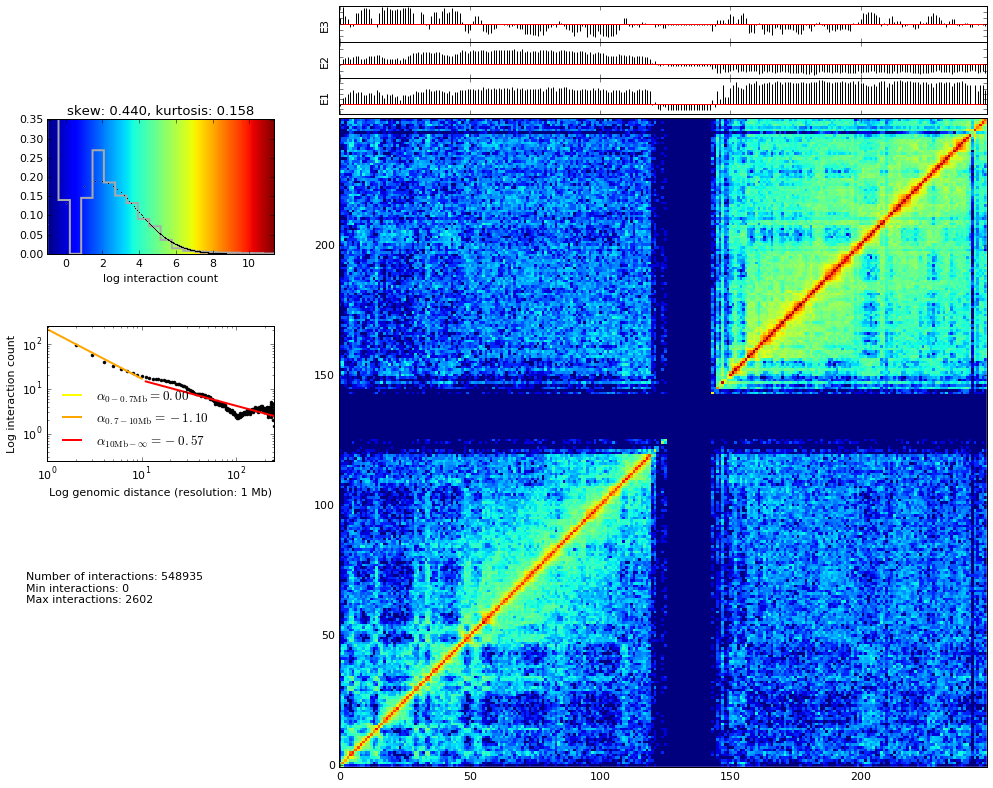

In [7]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), 
        resolution=1000000, show=True, focus='1')

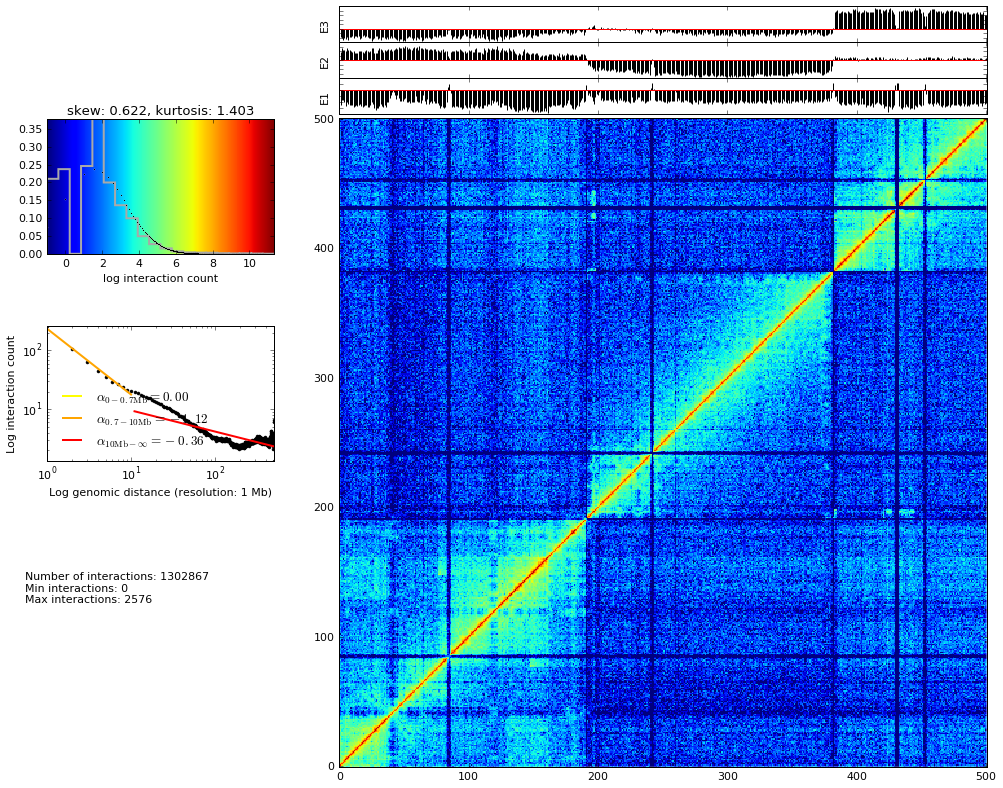

In [8]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), 
        resolution=1000000, show=True, focus=(500, 1000))